# The Battle of the Neighborhoods : Hennepin County, Minnesota
## IBM Data Science Professional Certificate
## Capstone Project
### Danielle Dumonceaux
### April 2020

In [2]:
import pandas as pd
import numpy as np
import os
print('Done')

Done


### Import population and neighborhood CSV files.

In [3]:
# The code was removed by Watson Studio for sharing.

,CO_CODE,CTU_CODE,CTU_ID,COCTU_ID,CTU_NAME,DATASOURCE_DESC,POP_RECORD_TYPE_DESC,YEAR,POPULATION,HOUSEHOLDS,GROUP_QUARTERS_POP,POPULATION_IN_HOUSEHOLDS,COMMUNITY_DESIGNATION
0,53,6616,2394198,5302394198,Bloomington,Metropolitan Council Research,Estimates,2017,88885,38022,1392,87493,Urban
1,53,7948,2393428,5302393428,Brooklyn Center,Metropolitan Council Research,Estimates,2017,31145,11063,239,30906,Urban
2,53,7966,2393429,5302393429,Brooklyn Park,Metropolitan Council Research,Estimates,2017,80866,27660,390,80476,Suburban
3,53,10846,2393797,5302393797,Champlin,Metropolitan Council Research,Estimates,2017,23690,8519,44,23646,Suburban
4,53,10918,2393799,5302393799,Chanhassen (Hennepin Co. part),Metropolitan Council Research,Estimates,2017,0,0,0,0,Emerging Suburban Edge


In [4]:

body = client_02bd5affc1c54cf1b385b9256da8fe0d.get_object(Bucket='capstoneproject-donotdelete-pr-vdp9atmxgzcp9s',Key='DataDownload-LED_WAGES.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

wages_df = pd.read_csv(body)
wages_df.head(6)


,CO_CODE,CTU_CODE,CTU_ID,COCTU_ID,CTU_NAME,YEAR,WAGE_LEVEL,COUNT,DATASOURCE
0,53,6616,2394198,5302394198,Bloomington,2017,"Number of Jobs with earnings $1,250 per month ...",19551,LED
1,53,6616,2394198,5302394198,Bloomington,2017,"Number of Jobs with earnings $1,251 to $3,333 ...",22656,LED
2,53,6616,2394198,5302394198,Bloomington,2017,"Number of Jobs with earnings greater than $3,3...",47363,LED
3,53,6616,2394198,5302394198,Bloomington,2017,"Number of Workers with earnings $1,250 per mon...",7148,LED
4,53,6616,2394198,5302394198,Bloomington,2017,"Number of Workers with earnings $1,251 to $3,3...",12127,LED
5,53,6616,2394198,5302394198,Bloomington,2017,Number of Workers with earnings greater than $...,23384,LED


### Identify the columns present in each csv file and drop columns that are not pertinent to the interest.

In [5]:
list(pop_df.columns.values) 

['CO_CODE',
 'CTU_CODE',
 'CTU_ID',
 'COCTU_ID',
 'CTU_NAME',
 'DATASOURCE_DESC',
 'POP_RECORD_TYPE_DESC',
 'YEAR',
 'POPULATION',
 'HOUSEHOLDS',
 'GROUP_QUARTERS_POP',
 'POPULATION_IN_HOUSEHOLDS',
 'COMMUNITY_DESIGNATION']

In [6]:
population=pop_df.drop(['CO_CODE', 'CTU_ID', 'COCTU_ID', 'YEAR', 'DATASOURCE_DESC', 'POP_RECORD_TYPE_DESC', 'GROUP_QUARTERS_POP', 'GROUP_QUARTERS_POP', 'POPULATION_IN_HOUSEHOLDS'], axis = 1)
population

,CTU_CODE,CTU_NAME,POPULATION,HOUSEHOLDS,COMMUNITY_DESIGNATION
0,6616,Bloomington,88885,38022,Urban
1,7948,Brooklyn Center,31145,11063,Urban
2,7966,Brooklyn Park,80866,27660,Suburban
3,10846,Champlin,23690,8519,Suburban
4,10918,Chanhassen (Hennepin Co. part),0,0,Emerging Suburban Edge
5,13168,Corcoran,5592,1957,Emerging Suburban Edge
6,14158,Crystal,22929,9488,Urban
7,15022,Dayton (Hennepin Co. part),5427,1910,Emerging Suburban Edge
8,15148,Deephaven,3948,1438,Suburban
9,18116,Eden Prairie,63726,24893,Suburban


In [7]:
list(wages_df.columns.values) 

['CO_CODE',
 'CTU_CODE',
 'CTU_ID',
 'COCTU_ID',
 'CTU_NAME',
 'YEAR',
 'WAGE_LEVEL',
 'COUNT',
 'DATASOURCE']

In [8]:
wages=wages_df.drop(['CO_CODE', 'CTU_ID', 'COCTU_ID', 'YEAR', 'DATASOURCE'], axis =1)
wages.head()

,CTU_CODE,CTU_NAME,WAGE_LEVEL,COUNT
0,6616,Bloomington,"Number of Jobs with earnings $1,250 per month ...",19551
1,6616,Bloomington,"Number of Jobs with earnings $1,251 to $3,333 ...",22656
2,6616,Bloomington,"Number of Jobs with earnings greater than $3,3...",47363
3,6616,Bloomington,"Number of Workers with earnings $1,250 per mon...",7148
4,6616,Bloomington,"Number of Workers with earnings $1,251 to $3,3...",12127


### As the interest desires to open their business in a middle-class wage area, remove wage levels that are counted by job and leave those counted by the number of workers.

In [9]:
w=wages.drop([0, 1, 2, 6,7,8, 12, 13, 14, 18, 19, 20, 24, 25, 26,27,28,29,33,34,35,39,40,41,45,46,47,51,52,53,57,58,59,63,64,65,69,70,71,75,76,77,81,82,83,87,88,89,93,94,95,99,100,101,105,106,107,111,112,113,117,118,119,123,124,135,136,137,141,142,143,147,148,149,153,154,155,159,160,161,165,166,167,171,172,173,125,129,130,131,177,178,179,183,184,185,189,190,191,195,196,197,201,202,203,207,208,209,213,214,215,219,220,221,225,226,227,231,232,233,237,238,239,243,244,245,249,250,251,255,256,257,261,262,263,267,268,269])
w.head()

,CTU_CODE,CTU_NAME,WAGE_LEVEL,COUNT
3,6616,Bloomington,"Number of Workers with earnings $1,250 per mon...",7148
4,6616,Bloomington,"Number of Workers with earnings $1,251 to $3,3...",12127
5,6616,Bloomington,Number of Workers with earnings greater than $...,23384
9,7948,Brooklyn Center,"Number of Workers with earnings $1,250 per mon...",2779
10,7948,Brooklyn Center,"Number of Workers with earnings $1,251 to $3,3...",5966


In [10]:
w.shape

(135, 4)

In [11]:
pop_wages =pd.merge(population, w)
pop_wages.head()

,CTU_CODE,CTU_NAME,POPULATION,HOUSEHOLDS,COMMUNITY_DESIGNATION,WAGE_LEVEL,COUNT
0,6616,Bloomington,88885,38022,Urban,"Number of Workers with earnings $1,250 per mon...",7148
1,6616,Bloomington,88885,38022,Urban,"Number of Workers with earnings $1,251 to $3,3...",12127
2,6616,Bloomington,88885,38022,Urban,Number of Workers with earnings greater than $...,23384
3,7948,Brooklyn Center,31145,11063,Urban,"Number of Workers with earnings $1,250 per mon...",2779
4,7948,Brooklyn Center,31145,11063,Urban,"Number of Workers with earnings $1,251 to $3,3...",5966


In [12]:
pop_wages.shape

(135, 7)

### Interest desires to open business in Urban community, therefore, remove all neighborhoods that are not designated as an Urban community.

In [13]:
pw=pop_wages.drop([6,7,8,9,10,11,12,13,14,18,19,20,21,22,23,24,25,26,30,31,32,39,40,41,42,43,44,45,46,47,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,75,76,77,78,79,80,81,82,83,84,85,86,90,91,92,96,97,98,105,106,107,108,109,110,111,112,113,114,115,116,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134])
pw.head()

,CTU_CODE,CTU_NAME,POPULATION,HOUSEHOLDS,COMMUNITY_DESIGNATION,WAGE_LEVEL,COUNT
0,6616,Bloomington,88885,38022,Urban,"Number of Workers with earnings $1,250 per mon...",7148
1,6616,Bloomington,88885,38022,Urban,"Number of Workers with earnings $1,251 to $3,3...",12127
2,6616,Bloomington,88885,38022,Urban,Number of Workers with earnings greater than $...,23384
3,7948,Brooklyn Center,31145,11063,Urban,"Number of Workers with earnings $1,250 per mon...",2779
4,7948,Brooklyn Center,31145,11063,Urban,"Number of Workers with earnings $1,251 to $3,3...",5966


In [14]:
pw.shape

(39, 7)

In [15]:
pw2=pw.replace({'COMMUNITY_DESIGNATION': 'Urban Center'}, {'COMMUNITY_DESIGNATION': 'Urban'}, regex=True)
pw2.head()

,CTU_CODE,CTU_NAME,POPULATION,HOUSEHOLDS,COMMUNITY_DESIGNATION,WAGE_LEVEL,COUNT
0,6616,Bloomington,88885,38022,Urban,"Number of Workers with earnings $1,250 per mon...",7148
1,6616,Bloomington,88885,38022,Urban,"Number of Workers with earnings $1,251 to $3,3...",12127
2,6616,Bloomington,88885,38022,Urban,Number of Workers with earnings greater than $...,23384
3,7948,Brooklyn Center,31145,11063,Urban,"Number of Workers with earnings $1,250 per mon...",2779
4,7948,Brooklyn Center,31145,11063,Urban,"Number of Workers with earnings $1,251 to $3,3...",5966


## Seperate out the three different Wage Levels

In [16]:
less_wages=pw2.loc[[0,3,15,27,33,36,48,72,87,93,99,102,117]]
less_wages

,CTU_CODE,CTU_NAME,POPULATION,HOUSEHOLDS,COMMUNITY_DESIGNATION,WAGE_LEVEL,COUNT
0,6616,Bloomington,88885,38022,Urban,"Number of Workers with earnings $1,250 per mon...",7148
3,7948,Brooklyn Center,31145,11063,Urban,"Number of Workers with earnings $1,250 per mon...",2779
15,14158,Crystal,22929,9488,Urban,"Number of Workers with earnings $1,250 per mon...",2048
27,18188,Edina,52497,22657,Urban,"Number of Workers with earnings $1,250 per mon...",3236
33,21965,Fort Snelling (Unorganized),271,190,Urban,"Number of Workers with earnings $1,250 per mon...",21
36,24308,Golden Valley,21646,9449,Urban,"Number of Workers with earnings $1,250 per mon...",1467
48,30140,Hopkins,19079,8765,Urban,"Number of Workers with earnings $1,250 per mon...",1631
72,43000,Minneapolis,423990,180340,Urban,"Number of Workers with earnings $1,250 per mon...",33553
87,45628,New Hope,21545,8851,Urban,"Number of Workers with earnings $1,250 per mon...",1838
93,49012,Osseo,2792,1285,Urban,"Number of Workers with earnings $1,250 per mon...",219


In [17]:
between_wages=pw2.loc[[1,4,16,28,34,37,49,73,88,94,100,103,118]]
between_wages

,CTU_CODE,CTU_NAME,POPULATION,HOUSEHOLDS,COMMUNITY_DESIGNATION,WAGE_LEVEL,COUNT
1,6616,Bloomington,88885,38022,Urban,"Number of Workers with earnings $1,251 to $3,3...",12127
4,7948,Brooklyn Center,31145,11063,Urban,"Number of Workers with earnings $1,251 to $3,3...",5966
16,14158,Crystal,22929,9488,Urban,"Number of Workers with earnings $1,251 to $3,3...",3646
28,18188,Edina,52497,22657,Urban,"Number of Workers with earnings $1,251 to $3,3...",3939
34,21965,Fort Snelling (Unorganized),271,190,Urban,"Number of Workers with earnings $1,251 to $3,3...",40
37,24308,Golden Valley,21646,9449,Urban,"Number of Workers with earnings $1,251 to $3,3...",2126
49,30140,Hopkins,19079,8765,Urban,"Number of Workers with earnings $1,251 to $3,3...",2710
73,43000,Minneapolis,423990,180340,Urban,"Number of Workers with earnings $1,251 to $3,3...",56845
88,45628,New Hope,21545,8851,Urban,"Number of Workers with earnings $1,251 to $3,3...",3227
94,49012,Osseo,2792,1285,Urban,"Number of Workers with earnings $1,251 to $3,3...",376


In [18]:
more_wages=pw2.loc[[2,5,17,29,35,38,50,74,89,95,101,104,119]]
more_wages

,CTU_CODE,CTU_NAME,POPULATION,HOUSEHOLDS,COMMUNITY_DESIGNATION,WAGE_LEVEL,COUNT
2,6616,Bloomington,88885,38022,Urban,Number of Workers with earnings greater than $...,23384
5,7948,Brooklyn Center,31145,11063,Urban,Number of Workers with earnings greater than $...,6312
17,14158,Crystal,22929,9488,Urban,Number of Workers with earnings greater than $...,6702
29,18188,Edina,52497,22657,Urban,Number of Workers with earnings greater than $...,14579
35,21965,Fort Snelling (Unorganized),271,190,Urban,Number of Workers with earnings greater than $...,31
38,24308,Golden Valley,21646,9449,Urban,Number of Workers with earnings greater than $...,6687
50,30140,Hopkins,19079,8765,Urban,Number of Workers with earnings greater than $...,4979
74,43000,Minneapolis,423990,180340,Urban,Number of Workers with earnings greater than $...,100309
89,45628,New Hope,21545,8851,Urban,Number of Workers with earnings greater than $...,5458
95,49012,Osseo,2792,1285,Urban,Number of Workers with earnings greater than $...,693


## Confirm the shape of the inital dataframe is equal to the shape of the three new dataframes that represent each Wage Level

In [19]:
pw2.shape

(39, 7)

In [20]:
less_wages.shape

(13, 7)

In [21]:
between_wages.shape

(13, 7)

In [22]:
more_wages.shape

(13, 7)

## Turn the dataframe specific Wage Level into a column with its respective counts and remove columns 'Wage_Level' and 'Count'

In [23]:
less_wages.loc[:,'Workers earning equal or less than $1,250 per month'] = pw2['COUNT']
less_wages2=less_wages.drop (['WAGE_LEVEL', 'COUNT'], axis =1)
less_wages2.head(3)    

,CTU_CODE,CTU_NAME,POPULATION,HOUSEHOLDS,COMMUNITY_DESIGNATION,"Workers earning equal or less than $1,250 per month"
0,6616,Bloomington,88885,38022,Urban,7148
3,7948,Brooklyn Center,31145,11063,Urban,2779
15,14158,Crystal,22929,9488,Urban,2048


In [24]:
between_wages.loc[:,"Workers earning between $1,251 and $3,333 per month"] = pw2['COUNT']
between_wages2=between_wages.drop (['WAGE_LEVEL', 'COUNT'], axis =1)
between_wages2.head(3)  

,CTU_CODE,CTU_NAME,POPULATION,HOUSEHOLDS,COMMUNITY_DESIGNATION,"Workers earning between $1,251 and $3,333 per month"
1,6616,Bloomington,88885,38022,Urban,12127
4,7948,Brooklyn Center,31145,11063,Urban,5966
16,14158,Crystal,22929,9488,Urban,3646


In [25]:
more_wages.loc[:,'Workers earning equal or more than $3,334 per month'] = pw2['COUNT']
more_wages2=more_wages.drop (['WAGE_LEVEL', 'COUNT'], axis =1)
more_wages2.head(3)  

,CTU_CODE,CTU_NAME,POPULATION,HOUSEHOLDS,COMMUNITY_DESIGNATION,"Workers earning equal or more than $3,334 per month"
2,6616,Bloomington,88885,38022,Urban,23384
5,7948,Brooklyn Center,31145,11063,Urban,6312
17,14158,Crystal,22929,9488,Urban,6702


## Merge all three Wage dataframes together and remove duplicate columns

In [26]:
dfNew = pd.merge(between_wages2, less_wages2, left_on='CTU_NAME', right_on= 'CTU_NAME', how='outer')
dfNew.head()


,CTU_CODE_x,CTU_NAME,POPULATION_x,HOUSEHOLDS_x,COMMUNITY_DESIGNATION_x,"Workers earning between $1,251 and $3,333 per month",CTU_CODE_y,POPULATION_y,HOUSEHOLDS_y,COMMUNITY_DESIGNATION_y,"Workers earning equal or less than $1,250 per month"
0,6616,Bloomington,88885,38022,Urban,12127,6616,88885,38022,Urban,7148
1,7948,Brooklyn Center,31145,11063,Urban,5966,7948,31145,11063,Urban,2779
2,14158,Crystal,22929,9488,Urban,3646,14158,22929,9488,Urban,2048
3,18188,Edina,52497,22657,Urban,3939,18188,52497,22657,Urban,3236
4,21965,Fort Snelling (Unorganized),271,190,Urban,40,21965,271,190,Urban,21


In [27]:
newDf = dfNew.drop(columns='CTU_CODE_y')
newDf2 =newDf.drop(columns='POPULATION_y')
newDf3=newDf2.drop(columns='HOUSEHOLDS_y')
newDf4=newDf3.drop(columns='COMMUNITY_DESIGNATION_y')
newDf4.head()

,CTU_CODE_x,CTU_NAME,POPULATION_x,HOUSEHOLDS_x,COMMUNITY_DESIGNATION_x,"Workers earning between $1,251 and $3,333 per month","Workers earning equal or less than $1,250 per month"
0,6616,Bloomington,88885,38022,Urban,12127,7148
1,7948,Brooklyn Center,31145,11063,Urban,5966,2779
2,14158,Crystal,22929,9488,Urban,3646,2048
3,18188,Edina,52497,22657,Urban,3939,3236
4,21965,Fort Snelling (Unorganized),271,190,Urban,40,21


In [28]:
dfNew4 = pd.merge(more_wages2, newDf4, left_on='CTU_NAME', right_on= 'CTU_NAME', how='outer')
dfNew4.head()

,CTU_CODE,CTU_NAME,POPULATION,HOUSEHOLDS,COMMUNITY_DESIGNATION,"Workers earning equal or more than $3,334 per month",CTU_CODE_x,POPULATION_x,HOUSEHOLDS_x,COMMUNITY_DESIGNATION_x,"Workers earning between $1,251 and $3,333 per month","Workers earning equal or less than $1,250 per month"
0,6616,Bloomington,88885,38022,Urban,23384,6616,88885,38022,Urban,12127,7148
1,7948,Brooklyn Center,31145,11063,Urban,6312,7948,31145,11063,Urban,5966,2779
2,14158,Crystal,22929,9488,Urban,6702,14158,22929,9488,Urban,3646,2048
3,18188,Edina,52497,22657,Urban,14579,18188,52497,22657,Urban,3939,3236
4,21965,Fort Snelling (Unorganized),271,190,Urban,31,21965,271,190,Urban,40,21


In [29]:
newDf5 = dfNew4.drop(columns='CTU_CODE_x')
newDf6 =newDf5.drop(columns='POPULATION_x')
newDf7=newDf6.drop(columns='HOUSEHOLDS_x')
pop_wage_combined=newDf7.drop(columns='COMMUNITY_DESIGNATION_x')
pop_wage_combined

,CTU_CODE,CTU_NAME,POPULATION,HOUSEHOLDS,COMMUNITY_DESIGNATION,"Workers earning equal or more than $3,334 per month","Workers earning between $1,251 and $3,333 per month","Workers earning equal or less than $1,250 per month"
0,6616,Bloomington,88885,38022,Urban,23384,12127,7148
1,7948,Brooklyn Center,31145,11063,Urban,6312,5966,2779
2,14158,Crystal,22929,9488,Urban,6702,3646,2048
3,18188,Edina,52497,22657,Urban,14579,3939,3236
4,21965,Fort Snelling (Unorganized),271,190,Urban,31,40,21
5,24308,Golden Valley,21646,9449,Urban,6687,2126,1467
6,30140,Hopkins,19079,8765,Urban,4979,2710,1631
7,43000,Minneapolis,423990,180340,Urban,100309,56845,33553
8,45628,New Hope,21545,8851,Urban,5458,3227,1838
9,49012,Osseo,2792,1285,Urban,693,376,219


In [30]:
pop_wage_combined.shape

(13, 8)

In [31]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')
print ('Matplotlib version: ', mpl.__version__)

Matplotlib version:  3.0.2


In [32]:
pop_wage_combined_bar=pop_wage_combined[['CTU_NAME', 'Workers earning equal or more than $3,334 per month', 'Workers earning between $1,251 and $3,333 per month', 'Workers earning equal or less than $1,250 per month', 'POPULATION']]
pop_wage_combined_bar                                           

,CTU_NAME,"Workers earning equal or more than $3,334 per month","Workers earning between $1,251 and $3,333 per month","Workers earning equal or less than $1,250 per month",POPULATION
0,Bloomington,23384,12127,7148,88885
1,Brooklyn Center,6312,5966,2779,31145
2,Crystal,6702,3646,2048,22929
3,Edina,14579,3939,3236,52497
4,Fort Snelling (Unorganized),31,40,21,271
5,Golden Valley,6687,2126,1467,21646
6,Hopkins,4979,2710,1631,19079
7,Minneapolis,100309,56845,33553,423990
8,New Hope,5458,3227,1838,21545
9,Osseo,693,376,219,2792


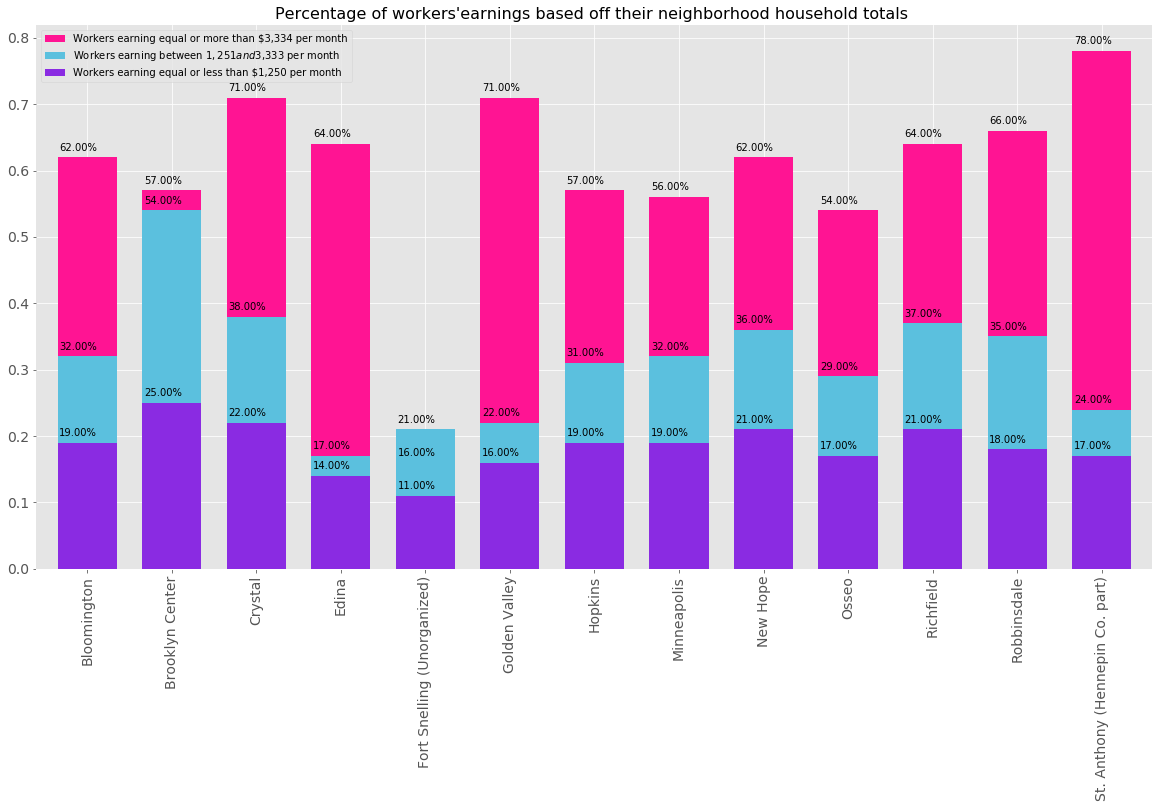

In [33]:
df_more_per = (pop_wage_combined_bar['Workers earning equal or more than $3,334 per month']/pop_wage_combined['HOUSEHOLDS']).round(2)
df_more_per2 = (pop_wage_combined_bar['Workers earning between $1,251 and $3,333 per month']/pop_wage_combined['HOUSEHOLDS']).round(2)
df_more_per3 = (pop_wage_combined_bar['Workers earning equal or less than $1,250 per month']/pop_wage_combined['HOUSEHOLDS']).round(2)                          
ax = df_more_per.plot(kind= 'bar', figsize =(20,10), width = 0.7, color = ['deeppink'], fontsize=14, label='Workers earning equal or more than $3,334 per month')
ax = df_more_per2.plot(kind= 'bar', figsize =(20,10), width = 0.7, color = ["#5bc0de"], fontsize=14, label='Workers earning between $1,251 and $3,333 per month')
ax = df_more_per3.plot(kind= 'bar', figsize =(20,10), width = 0.7, color = ['blueviolet'], fontsize=14, label='Workers earning equal or less than $1,250 per month')


ax.set_title("Percentage of workers'earnings based off their neighborhood household totals ", fontsize=16)
ax.set_xticklabels(pop_wage_combined['CTU_NAME'])

ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
for p in ax.patches:
    ax.annotate("{:.2%}".format(p.get_height()),
    xy=(p.get_x()+0.02, p.get_height()+0.01))

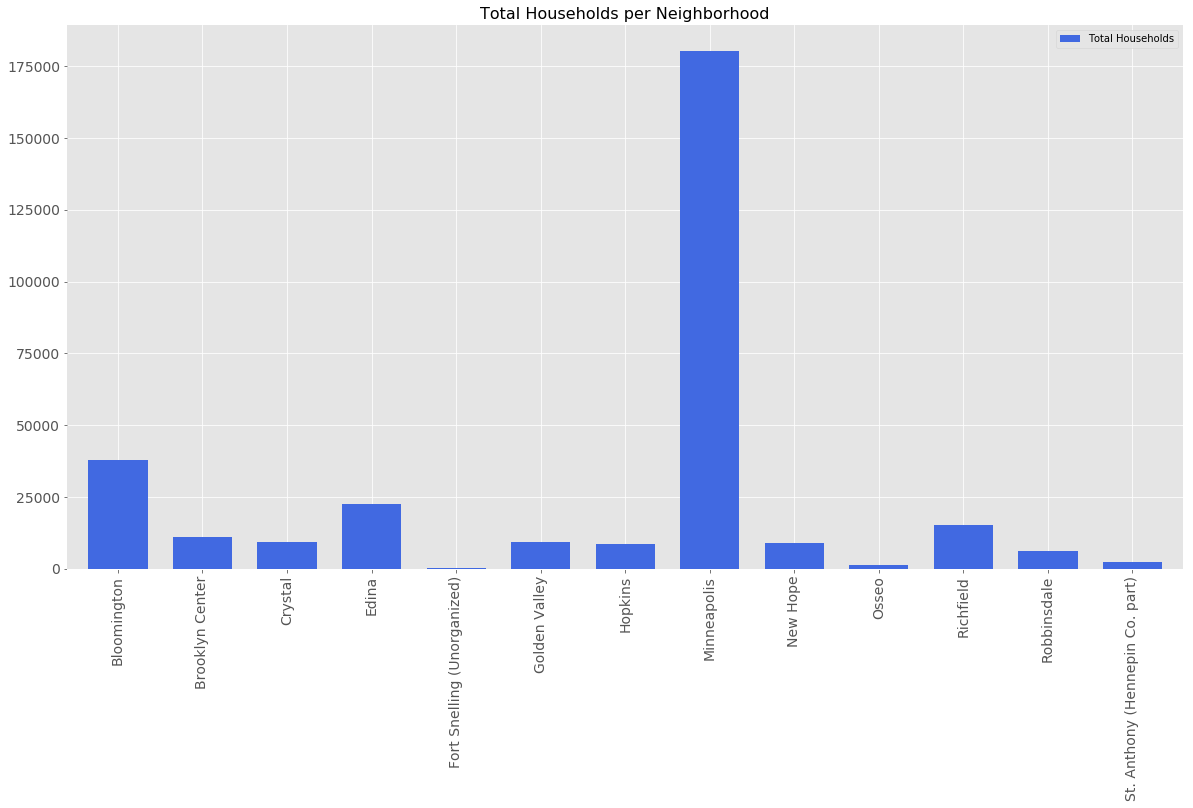

In [34]:
df_more_per4 = (pop_wage_combined['HOUSEHOLDS'])
ax = df_more_per4.plot(kind= 'bar', figsize =(20,10), width = 0.7, color = ['royalblue'], fontsize=14, label='Total Households')

ax.set_title("Total Households per Neighborhood", fontsize=16)
ax.set_xticklabels(pop_wage_combined_bar['CTU_NAME'])

ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

## As the interest desires to open a business in a middle class neighborhood with adaquate population to support the new business, graph the households in the neighborhoods in comparrison to the amount of households that earn equal or more than 3,334 dollars per month.

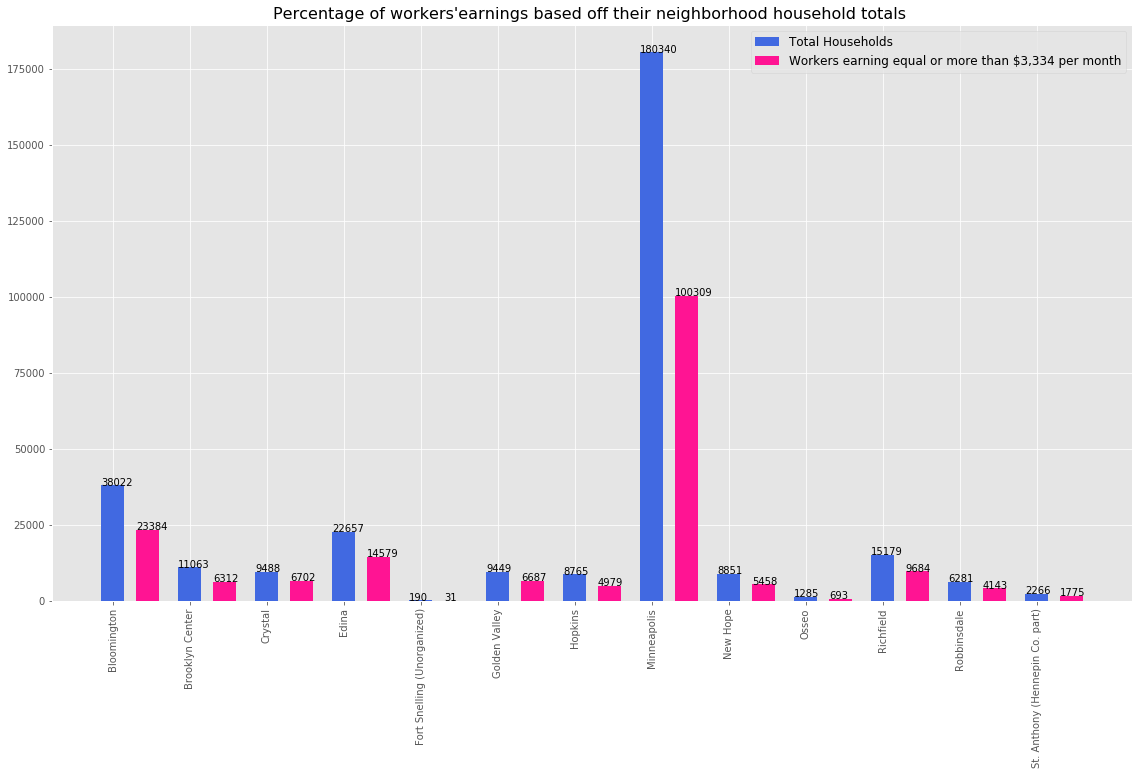

In [35]:
X = np.arange(13)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(X + 0.00, pop_wage_combined['HOUSEHOLDS'], color = 'royalblue', width = 0.3, align='center', label='Total Households')
ax.bar(X + 0.3, pop_wage_combined_bar['Workers earning equal or more than $3,334 per month'], color = 'deeppink', width = 0.3, align='edge', label='Workers earning equal or more than $3,334 per month')
ax.set_title("Percentage of workers'earnings based off their neighborhood household totals ", fontsize=16)
fig.set_size_inches (15, 8, forward=False)
ax.set_xticklabels(pop_wage_combined_bar['CTU_NAME'])
plt.xticks(rotation=90)
plt.xticks(np.arange(0,13))


ax.legend(fontsize=12)
for p in ax.patches:
    ax.annotate("{:}".format(p.get_height()),
    xy=(p.get_x(), p.get_height()+0.2))

## Find the percentage of Workers earning equal or more than $3,334 per month are in each neighborhood

In [36]:
per=(pop_wage_combined_bar['Workers earning equal or more than $3,334 per month'])/(pop_wage_combined['HOUSEHOLDS'])
per2=per.round(2)*100
per2

0     62.0
1     57.0
2     71.0
3     64.0
4     16.0
5     71.0
6     57.0
7     56.0
8     62.0
9     54.0
10    64.0
11    66.0
12    78.0
dtype: float64

In [37]:
pop_wage_combined_bar['Percentage of Middle Class Workers']=per2
pop_wage_combined_bar

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,CTU_NAME,"Workers earning equal or more than $3,334 per month","Workers earning between $1,251 and $3,333 per month","Workers earning equal or less than $1,250 per month",POPULATION,Percentage of Middle Class Workers
0,Bloomington,23384,12127,7148,88885,62.0
1,Brooklyn Center,6312,5966,2779,31145,57.0
2,Crystal,6702,3646,2048,22929,71.0
3,Edina,14579,3939,3236,52497,64.0
4,Fort Snelling (Unorganized),31,40,21,271,16.0
5,Golden Valley,6687,2126,1467,21646,71.0
6,Hopkins,4979,2710,1631,19079,57.0
7,Minneapolis,100309,56845,33553,423990,56.0
8,New Hope,5458,3227,1838,21545,62.0
9,Osseo,693,376,219,2792,54.0


In [38]:
city_pop_per=pop_wage_combined_bar[['CTU_NAME', 'POPULATION', 'Percentage of Middle Class Workers']]
city_pop_per

,CTU_NAME,POPULATION,Percentage of Middle Class Workers
0,Bloomington,88885,62.0
1,Brooklyn Center,31145,57.0
2,Crystal,22929,71.0
3,Edina,52497,64.0
4,Fort Snelling (Unorganized),271,16.0
5,Golden Valley,21646,71.0
6,Hopkins,19079,57.0
7,Minneapolis,423990,56.0
8,New Hope,21545,62.0
9,Osseo,2792,54.0


## The data set has been greatly reduced from its original size, and we can continue to narrow the results. The interest desires to open their business in a neighborhood that is between 21,000 and 90,000 residents, and where there are at least 64% of the households that are middle class workers. Therefore, we can shrink down the dataframe even further. 

In [39]:
city_pop_per2=city_pop_per.loc[[2,3,5,10]]
city_pop_per2

,CTU_NAME,POPULATION,Percentage of Middle Class Workers
2,Crystal,22929,71.0
3,Edina,52497,64.0
5,Golden Valley,21646,71.0
10,Richfield,36544,64.0


In [40]:
city_pop_per2.dtypes

CTU_NAME                               object
POPULATION                              int64
Percentage of Middle Class Workers    float64
dtype: object

In [1]:
#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
print('Done')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1f             |       h516909a_0         2.1 MB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ------------------------------------------------------------
                       

**Use geopy library to get the latitude and longitude values of four remaining Hennepin County neighborhoods that fit the desire of the interest.**

In [41]:
address = 'Crystal, MN'

geolocator = Nominatim(user_agent="mn_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Crystal are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Crystal are 47.9294532, 106.9353535.


In [42]:
address = 'Edina, MN'

geolocator = Nominatim(user_agent="mn_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Edina are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Edina are 44.8897027, -93.3501222.


In [43]:
address = 'Golden Valley, MN'

geolocator = Nominatim(user_agent="mn_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Golden Valley are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Golden Valley are 44.9861176, -93.3784618.


In [44]:
address = 'Richfield, MN'

geolocator = Nominatim(user_agent="mn_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Richfield are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Richfield are 44.8766431, -93.2877877.


In [45]:
long_df=np.array([-93.357536, -93.3501222, -93.3784618, -93.2877877])
lat_df=np.array([45.032421, 44.8897027, 44.9861176, 44.8766431])

In [46]:
city_pop_per2['LONGITUDE']=long_df
city_pop_per2

,CTU_NAME,POPULATION,Percentage of Middle Class Workers,LONGITUDE
2,Crystal,22929,71.0,-93.357536
3,Edina,52497,64.0,-93.350122
5,Golden Valley,21646,71.0,-93.378462
10,Richfield,36544,64.0,-93.287788


In [47]:
city_pop_per2['LATITUDE']=lat_df
city_pop_per2

,CTU_NAME,POPULATION,Percentage of Middle Class Workers,LONGITUDE,LATITUDE
2,Crystal,22929,71.0,-93.357536,45.032421
3,Edina,52497,64.0,-93.350122,44.889703
5,Golden Valley,21646,71.0,-93.378462,44.986118
10,Richfield,36544,64.0,-93.287788,44.876643


In [48]:
df_pop=city_pop_per2.reset_index()
df_pop

,index,CTU_NAME,POPULATION,Percentage of Middle Class Workers,LONGITUDE,LATITUDE
0,2,Crystal,22929,71.0,-93.357536,45.032421
1,3,Edina,52497,64.0,-93.350122,44.889703
2,5,Golden Valley,21646,71.0,-93.378462,44.986118
3,10,Richfield,36544,64.0,-93.287788,44.876643


In [49]:
df_pop2=df_pop.rename(columns={"CTU_NAME": "Neighborhood"})
df_pop2

,index,Neighborhood,POPULATION,Percentage of Middle Class Workers,LONGITUDE,LATITUDE
0,2,Crystal,22929,71.0,-93.357536,45.032421
1,3,Edina,52497,64.0,-93.350122,44.889703
2,5,Golden Valley,21646,71.0,-93.378462,44.986118
3,10,Richfield,36544,64.0,-93.287788,44.876643


In [50]:
df_pop2.dtypes

index                                   int64
Neighborhood                           object
POPULATION                              int64
Percentage of Middle Class Workers    float64
LONGITUDE                             float64
LATITUDE                              float64
dtype: object

**Create a may of Hennepin County with neighborhoods superimposed on top**

In [51]:
address = 'Hennepin County, MN'

geolocator = Nominatim(user_agent="mn_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Hennepin County are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Hennepin County are 45.0257232, -93.4865052.


In [52]:
# create map of Hennepin County using latitude and longitude values
map_hennepin = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df_pop2['LATITUDE'], df_pop2['LONGITUDE'], df_pop2['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_hennepin)  
    
map_hennepin

**Use Foursquare API to explore the neighborhoods and segment them.**

In [53]:
# The code was removed by Watson Studio for sharing.

Your credentails:
CLIENT_ID: SUEGLJXM55SFLA5BCDPX2MYQLZIXOD0C5Y5NX0CK4BU4KBTN
CLIENT_SECRET:YG5DH15AZPWFQL1G0HGKGXIAFNAGD50MAF3ETGZW0ZAMVCMH


**Let's explore the first neighborhood in the dataframe.**
Acquire the neighborhood's name. 

In [54]:
df_pop2.loc[0, 'Neighborhood']

'Crystal'

In [55]:
neighborhood_latitude = df_pop2.loc[0, 'LATITUDE'] 
neighborhood_longitude = df_pop2.loc[0, 'LONGITUDE'] 

neighborhood_name = df_pop2.loc[0, 'Neighborhood'] 

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Crystal are 45.032421, -93.357536.


Get the top 100 veues that are in Crystal within a radius of 500.

In [56]:
LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=SUEGLJXM55SFLA5BCDPX2MYQLZIXOD0C5Y5NX0CK4BU4KBTN&client_secret=YG5DH15AZPWFQL1G0HGKGXIAFNAGD50MAF3ETGZW0ZAMVCMH&v=20180605&ll=45.032421,-93.357536&radius=500&limit=100'

In [57]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e939d9e98205d001bb9c56c'},
 'response': {'headerLocation': 'Crystal',
  'headerFullLocation': 'Crystal',
  'headerLocationGranularity': 'city',
  'totalResults': 9,
  'suggestedBounds': {'ne': {'lat': 45.0369210045, 'lng': -93.35118031746008},
   'sw': {'lat': 45.0279209955, 'lng': -93.36389168253991}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b300393f964a52071f424e3',
       'name': 'Sweet Taste of Italy',
       'location': {'address': '6023 42nd Ave N',
        'crossStreet': 'Adair',
        'lat': 45.032233461951485,
        'lng': -93.35707425821903,
        'labeledLatLngs': [{'label': 'display',
          'lat': 45.032233461951485,
          'lng': -93.35707425821903}],
        'distance': 41,
        'postalCode': '5

In [58]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [59]:
from pandas.io.json import json_normalize
print('Done')

Done


In [60]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Sweet Taste of Italy,Italian Restaurant,45.032233,-93.357074
1,Almsted's Fresh Market,Grocery Store,45.032826,-93.359751
2,Keng's Chow Mein,Chinese Restaurant,45.032387,-93.358392
3,Hennepin County Library - Rockford Road,Library,45.031952,-93.361503
4,El Globo Panaderia,Bakery,45.032475,-93.358962


In [61]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

9 venues were returned by Foursquare.


In [62]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [63]:
hennepin_venues = getNearbyVenues(names=df_pop2['Neighborhood'],
                                   latitudes=df_pop2['LATITUDE'],
                                   longitudes=df_pop2['LONGITUDE']
                                  )

Crystal
Edina
Golden Valley
Richfield


In [64]:
print(hennepin_venues.shape)
hennepin_venues

(50, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Crystal,45.032421,-93.357536,Sweet Taste of Italy,45.032233,-93.357074,Italian Restaurant
1,Crystal,45.032421,-93.357536,Almsted's Fresh Market,45.032826,-93.359751,Grocery Store
2,Crystal,45.032421,-93.357536,Keng's Chow Mein,45.032387,-93.358392,Chinese Restaurant
3,Crystal,45.032421,-93.357536,Hennepin County Library - Rockford Road,45.031952,-93.361503,Library
4,Crystal,45.032421,-93.357536,El Globo Panaderia,45.032475,-93.358962,Bakery
5,Crystal,45.032421,-93.357536,Adair Liquors,45.032062,-93.356624,Liquor Store
6,Crystal,45.032421,-93.357536,Mill End Textiles,45.032150,-93.357977,Arts & Crafts Store
7,Crystal,45.032421,-93.357536,Garage Door Repair Crystal,45.028558,-93.359413,Home Service
8,Crystal,45.032421,-93.357536,Select Home Care LLC,45.036595,-93.355680,Home Service
9,Edina,44.889703,-93.350122,The ModernSportsman Edina,44.889687,-93.349949,Hunting Supply


In [65]:
hennepin_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Crystal,9,9,9,9,9,9
Edina,4,4,4,4,4,4
Golden Valley,33,33,33,33,33,33
Richfield,4,4,4,4,4,4


In [66]:
print('There are {} uniques categories.'.format(len(hennepin_venues['Venue Category'].unique())))

There are 36 uniques categories.


## Let's analyse each neighborhood

In [67]:
# one hot encoding
hennepin_onehot = pd.get_dummies(hennepin_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
hennepin_onehot['Neighborhood'] = hennepin_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [hennepin_onehot.columns[-1]] + list(hennepin_onehot.columns[:-1])
hennepin_onehot = hennepin_onehot[fixed_columns]

hennepin_onehot.head()

,Neighborhood,ATM,American Restaurant,Arts & Crafts Store,Bakery,Burger Joint,Chinese Restaurant,Coffee Shop,Dive Bar,Gastropub,...,Pizza Place,Pool,Record Shop,Salon / Barbershop,Sandwich Place,Shipping Store,Soccer Field,Tanning Salon,Thrift / Vintage Store,Wine Shop
0,Crystal,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Crystal,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Crystal,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Crystal,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Crystal,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
hennepin_onehot.shape

(50, 37)

Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category.

In [69]:
hennepin_grouped = hennepin_onehot.groupby('Neighborhood').mean().reset_index()
hennepin_grouped

,Neighborhood,ATM,American Restaurant,Arts & Crafts Store,Bakery,Burger Joint,Chinese Restaurant,Coffee Shop,Dive Bar,Gastropub,...,Pizza Place,Pool,Record Shop,Salon / Barbershop,Sandwich Place,Shipping Store,Soccer Field,Tanning Salon,Thrift / Vintage Store,Wine Shop
0,Crystal,0.000000,0.000000,0.111111,0.111111,0.000000,0.111111,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,Edina,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.25,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2,Golden Valley,0.030303,0.060606,0.000000,0.000000,0.030303,0.060606,0.060606,0.030303,0.030303,...,0.060606,0.00,0.030303,0.030303,0.060606,0.030303,0.0,0.030303,0.060606,0.030303
3,Richfield,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.000000


In [70]:
hennepin_grouped.shape

(4, 37)

In [71]:
num_top_venues = 5

for hood in hennepin_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = hennepin_grouped[hennepin_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Crystal----
                venue  freq
0        Home Service  0.22
1        Liquor Store  0.11
2  Chinese Restaurant  0.11
3             Library  0.11
4  Italian Restaurant  0.11


----Edina----
                  venue  freq
0                  Pool  0.25
1         Movie Theater  0.25
2        Hunting Supply  0.25
3  Gym / Fitness Center  0.25
4           Pizza Place  0.00


----Golden Valley----
                    venue  freq
0  Thrift / Vintage Store  0.06
1      Mexican Restaurant  0.06
2      Chinese Restaurant  0.06
3             Coffee Shop  0.06
4          Sandwich Place  0.06


----Richfield----
          venue  freq
0  Soccer Field  0.50
1        Museum  0.25
2      Dive Bar  0.25
3           ATM  0.00
4          Pool  0.00




In [72]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [73]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = hennepin_grouped['Neighborhood']

for ind in np.arange(hennepin_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(hennepin_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Crystal,Home Service,Library,Chinese Restaurant,Grocery Store,Italian Restaurant,Liquor Store,Bakery,Arts & Crafts Store,Burger Joint,Coffee Shop
1,Edina,Hunting Supply,Gym / Fitness Center,Movie Theater,Pool,Wine Shop,Gastropub,Home Service,Gym,Grocery Store,Gift Shop
2,Golden Valley,American Restaurant,Chinese Restaurant,Sandwich Place,Coffee Shop,Pizza Place,Gift Shop,Thrift / Vintage Store,Mexican Restaurant,Wine Shop,Liquor Store
3,Richfield,Soccer Field,Dive Bar,Museum,Gastropub,Hunting Supply,Home Service,Gym / Fitness Center,Gym,Grocery Store,Gift Shop


## Cluster neighborhoods with K-Mean Clusters

In [74]:
# set number of clusters
kclusters = 4

hennepin_grouped_clustering = hennepin_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(hennepin_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 2, 3, 1], dtype=int32)

In [75]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

hennepin_merged = df_pop2

# merge hennepin_grouped with hennepin_data to add latitude/longitude for each neighborhood
hennepin_merged = hennepin_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

hennepin_merged.head() # check the last columns!

,index,Neighborhood,POPULATION,Percentage of Middle Class Workers,LONGITUDE,LATITUDE,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,2,Crystal,22929,71.0,-93.357536,45.032421,0,Home Service,Library,Chinese Restaurant,Grocery Store,Italian Restaurant,Liquor Store,Bakery,Arts & Crafts Store,Burger Joint,Coffee Shop
1,3,Edina,52497,64.0,-93.350122,44.889703,2,Hunting Supply,Gym / Fitness Center,Movie Theater,Pool,Wine Shop,Gastropub,Home Service,Gym,Grocery Store,Gift Shop
2,5,Golden Valley,21646,71.0,-93.378462,44.986118,3,American Restaurant,Chinese Restaurant,Sandwich Place,Coffee Shop,Pizza Place,Gift Shop,Thrift / Vintage Store,Mexican Restaurant,Wine Shop,Liquor Store
3,10,Richfield,36544,64.0,-93.287788,44.876643,1,Soccer Field,Dive Bar,Museum,Gastropub,Hunting Supply,Home Service,Gym / Fitness Center,Gym,Grocery Store,Gift Shop


In [76]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [77]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(hennepin_merged['LATITUDE'], hennepin_merged['LONGITUDE'], hennepin_merged['Neighborhood'], hennepin_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [78]:
hennepin_merged.loc[hennepin_merged['Cluster Labels'] == 0, hennepin_merged.columns[[1] + list(range(5, hennepin_merged.shape[1]))]]

,Neighborhood,LATITUDE,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Crystal,45.032421,0,Home Service,Library,Chinese Restaurant,Grocery Store,Italian Restaurant,Liquor Store,Bakery,Arts & Crafts Store,Burger Joint,Coffee Shop


In [79]:
hennepin_merged.loc[hennepin_merged['Cluster Labels'] == 1, hennepin_merged.columns[[1] + list(range(5, hennepin_merged.shape[1]))]]

,Neighborhood,LATITUDE,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Richfield,44.876643,1,Soccer Field,Dive Bar,Museum,Gastropub,Hunting Supply,Home Service,Gym / Fitness Center,Gym,Grocery Store,Gift Shop


In [80]:
hennepin_merged.loc[hennepin_merged['Cluster Labels'] == 2, hennepin_merged.columns[[1] + list(range(5, hennepin_merged.shape[1]))]]

,Neighborhood,LATITUDE,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Edina,44.889703,2,Hunting Supply,Gym / Fitness Center,Movie Theater,Pool,Wine Shop,Gastropub,Home Service,Gym,Grocery Store,Gift Shop


In [81]:
hennepin_merged.loc[hennepin_merged['Cluster Labels'] == 3, hennepin_merged.columns[[1] + list(range(5, hennepin_merged.shape[1]))]]

,Neighborhood,LATITUDE,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Golden Valley,44.986118,3,American Restaurant,Chinese Restaurant,Sandwich Place,Coffee Shop,Pizza Place,Gift Shop,Thrift / Vintage Store,Mexican Restaurant,Wine Shop,Liquor Store


### By the results of the K-Means, we are able to see that there were not enough variables in play to determin with city would be the best to open a business for the interest. Therefore, we are going to run K-Means again, however, we are going to analyze all the neighborhoods to determine which region of Hennepin County would be best for the interest, and then determine which of our four desired cities is closest to the most populous K-Means cluster. 

In [82]:
body = client_02bd5affc1c54cf1b385b9256da8fe0d.get_object(Bucket='capstoneproject-donotdelete-pr-vdp9atmxgzcp9s',Key='Lat_Long.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

latlong_df = pd.read_excel(body)
latlong_df.head()


,CTU_CODE,Neighborhood,Latitude,Longitude
0,6616,Bloomington,44.83,-93.32
1,7948,Brooklyn Center,45.07,-93.32
2,7966,Brooklyn Park,45.11,-93.35
3,10846,Champlin,45.17,-93.39
4,10918,Chanhassen (Hennepin Co. part),44.85,-93.56


In [83]:
latlong_df.dtypes

CTU_CODE          int64
Neighborhood     object
Latitude        float64
Longitude       float64
dtype: object

In [84]:
latlong_df.loc[0, 'Neighborhood']

'Bloomington'

In [85]:
neighborhood_latitude2 = latlong_df.loc[0, 'Latitude'] 
neighborhood_longitude2 = latlong_df.loc[0, 'Longitude'] 

neighborhood_name2 = latlong_df.loc[0, 'Neighborhood'] 

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name2, 
                                                               neighborhood_latitude2, 
                                                               neighborhood_longitude2))

Latitude and longitude values of Bloomington are 44.83, -93.32.


In [86]:
LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude2, 
    neighborhood_longitude2, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=SUEGLJXM55SFLA5BCDPX2MYQLZIXOD0C5Y5NX0CK4BU4KBTN&client_secret=YG5DH15AZPWFQL1G0HGKGXIAFNAGD50MAF3ETGZW0ZAMVCMH&v=20180605&ll=44.83,-93.32&radius=500&limit=100'

In [87]:
results2 = requests.get(url).json()
results2

{'meta': {'code': 200, 'requestId': '5e939ed847b43d002b806fef'},
 'response': {'headerLocation': 'East Bloomington',
  'headerFullLocation': 'East Bloomington, Bloomington',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 4,
  'suggestedBounds': {'ne': {'lat': 44.8345000045, 'lng': -93.31366667829937},
   'sw': {'lat': 44.825499995499996, 'lng': -93.32633332170062}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4a1c3c38f964a520287b1fe3',
       'name': 'Bloomington Ice Garden',
       'location': {'address': '3600 W 98th St',
        'lat': 44.828248309341504,
        'lng': -93.32449081699251,
        'labeledLatLngs': [{'label': 'display',
          'lat': 44.828248309341504,
          'lng': -93.32449081699251}],
        'distance': 404,
        'p

In [88]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [89]:
from pandas.io.json import json_normalize
print('Done')

Done


In [90]:
venues2 = results2['response']['groups'][0]['items']
    
nearby_venues2 = json_normalize(venues2) # flatten JSON

# filter columns
filtered_columns2 = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues2 =nearby_venues2.loc[:, filtered_columns2]

# filter the category for each row
nearby_venues2['venue.categories'] = nearby_venues2.apply(get_category_type, axis=1)

# clean columns
nearby_venues2.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues2.head()

,name,categories,lat,lng
0,Bloomington Ice Garden,Skating Rink,44.828248,-93.324491
1,Locksmith Bloomington,Locksmith,44.831100,-93.318622
2,DIRECTV,Business Service,44.832257,-93.321444
3,Top Team Garage Door Repair,Home Service,44.834204,-93.321648


In [91]:
print('{} venues were returned by Foursquare.'.format(nearby_venues2.shape[0]))

4 venues were returned by Foursquare.


In [92]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list2=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results2 = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list2.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results2])

    nearby_venues2 = pd.DataFrame([item for venues_list2 in venues_list2 for item in venues_list2])
    nearby_venues2.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues2)

In [93]:
hennepin_venues2 = getNearbyVenues(names=latlong_df['Neighborhood'],
                                   latitudes=latlong_df['Latitude'],
                                   longitudes=latlong_df['Longitude'])

Bloomington
Brooklyn Center
Brooklyn Park
Champlin
Chanhassen (Hennepin Co. part)
Corcoran
Crystal
Dayton (Hennepin Co. part)
Deephaven
Eden Prairie
Edina
Excelsior
Fort Snelling (Unorganized)
Golden Valley
Greenfield
Greenwood
Hanover (Hennepin Co. part)
Hopkins
Independence
Long Lake
Loretto
Maple Grove
Maple Plain
Medicine Lake
Medina
Minneapolis
Minnetonka
Minnetonka Beach
Minnetrista
Mound
New Hope
Orono
Osseo
Plymouth
Richfield
Robbinsdale
Rockford (Hennepin Co. part)
Rogers
Shorewood
Spring Park
St. Anthony (Hennepin Co. part)
St. Bonifacius
St. Louis Park
Tonka Bay
Wayzata
Woodland


In [94]:
print(hennepin_venues2.shape)
hennepin_venues2

(218, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bloomington,44.83,-93.32,Bloomington Ice Garden,44.828248,-93.324491,Skating Rink
1,Bloomington,44.83,-93.32,Locksmith Bloomington,44.831100,-93.318622,Locksmith
2,Bloomington,44.83,-93.32,DIRECTV,44.832257,-93.321444,Business Service
3,Bloomington,44.83,-93.32,Top Team Garage Door Repair,44.834204,-93.321648,Home Service
4,Brooklyn Center,45.07,-93.32,Bakers Square,45.068051,-93.315248,American Restaurant
5,Brooklyn Center,45.07,-93.32,Dollar Tree,45.070354,-93.325919,Discount Store
6,Brooklyn Center,45.07,-93.32,Centennial Park,45.071326,-93.317511,Park
7,Brooklyn Center,45.07,-93.32,Brookdale Shopping Center,45.065520,-93.319681,Shopping Mall
8,Brooklyn Park,45.11,-93.35,Brooklyn Park Community Center,45.110451,-93.352634,College Rec Center
9,Brooklyn Park,45.11,-93.35,Brooklyn Park Arena,45.110696,-93.352845,Hockey Arena


In [95]:
hennepin_venues2.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Bloomington,4,4,4,4,4,4
Brooklyn Center,4,4,4,4,4,4
Brooklyn Park,5,5,5,5,5,5
Champlin,8,8,8,8,8,8
Chanhassen (Hennepin Co. part),4,4,4,4,4,4
Crystal,3,3,3,3,3,3
Deephaven,1,1,1,1,1,1
Eden Prairie,3,3,3,3,3,3
Edina,3,3,3,3,3,3


In [96]:
print('There are {} uniques categories.'.format(len(hennepin_venues2['Venue Category'].unique())))

There are 118 uniques categories.


In [97]:
# one hot encoding
hennepin_onehot2 = pd.get_dummies(hennepin_venues2[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
hennepin_onehot2['Neighborhood'] = hennepin_venues2['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [hennepin_onehot2.columns[-1]] + list(hennepin_onehot2.columns[:-1])
hennepin_onehot2 = hennepin_onehot2[fixed_columns]

hennepin_onehot2.head()

,Neighborhood,ATM,American Restaurant,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,...,Theme Restaurant,Thrift / Vintage Store,Trail,Video Store,Water Park,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Bloomington,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Bloomington,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Bloomington,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Bloomington,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Brooklyn Center,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
hennepin_onehot2.shape

(218, 119)

In [99]:
hennepin_grouped2 = hennepin_onehot2.groupby('Neighborhood').mean().reset_index()
hennepin_grouped2

,Neighborhood,ATM,American Restaurant,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,...,Theme Restaurant,Thrift / Vintage Store,Trail,Video Store,Water Park,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Bloomington,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000
1,Brooklyn Center,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000
2,Brooklyn Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000
3,Champlin,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.125000,0.000000,0.125000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000
4,Chanhassen (Hennepin Co. part),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000
5,Crystal,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.333333,0.000000,0.00000,0.000000,0.00000,0.00000
6,Deephaven,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000
7,Eden Prairie,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000
8,Edina,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.333333,0.00000,0.000000,0.00000,0.00000
9,Excelsior,0.000000,0.058824,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000


In [100]:
hennepin_grouped2.shape

(37, 119)

In [101]:
num_top_venues2 = 5

for hood in hennepin_grouped2['Neighborhood']:
    print("----"+hood+"----")
    temp2 = hennepin_grouped2[hennepin_grouped2['Neighborhood'] == hood].T.reset_index()
    temp2.columns = ['venue','freq']
    temp2 = temp2.iloc[1:]
    temp2['freq'] = temp2['freq'].astype(float)
    temp2 = temp2.round({'freq': 2})
    print(temp2.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues2))
    print('\n')

----Bloomington----
              venue  freq
0      Home Service  0.25
1         Locksmith  0.25
2  Business Service  0.25
3      Skating Rink  0.25
4               ATM  0.00


----Brooklyn Center----
                 venue  freq
0  American Restaurant  0.25
1       Discount Store  0.25
2                 Park  0.25
3        Shopping Mall  0.25
4           Playground  0.00


----Brooklyn Park----
                  venue  freq
0          Hockey Arena   0.2
1    College Rec Center   0.2
2  Gym / Fitness Center   0.2
3                  Bank   0.2
4                  Park   0.2


----Champlin----
                  venue  freq
0     Mobile Phone Shop  0.12
1           Coffee Shop  0.12
2         Big Box Store  0.12
3  Fast Food Restaurant  0.12
4                   Gym  0.12


----Chanhassen (Hennepin Co. part)----
            venue  freq
0      Playground  0.25
1      Print Shop  0.25
2  Ice Cream Shop  0.25
3            Park  0.25
4     Music Store  0.00


----Crystal----
            venue 

In [102]:
def return_most_common_venues(row, num_top_venues2):
    row_categories2 = row.iloc[1:]
    row_categories_sorted2 = row_categories2.sort_values(ascending=False)
    
    return row_categories_sorted2.index.values[0:num_top_venues2]

In [103]:
num_top_venues2 = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues2):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted2 = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted2['Neighborhood'] = hennepin_grouped2['Neighborhood']

for ind in np.arange(hennepin_grouped.shape[0]):
    neighborhoods_venues_sorted2.iloc[ind, 1:] = return_most_common_venues(hennepin_grouped2.iloc[ind, :], num_top_venues2)

neighborhoods_venues_sorted2.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bloomington,Skating Rink,Home Service,Business Service,Locksmith,Yoga Studio,Concert Hall,Construction & Landscaping,Cosmetics Shop,Deli / Bodega,Diner
1,Brooklyn Center,American Restaurant,Park,Discount Store,Shopping Mall,Yoga Studio,Food Truck,Concert Hall,Construction & Landscaping,Cosmetics Shop,Deli / Bodega
2,Brooklyn Park,College Rec Center,Hockey Arena,Gym / Fitness Center,Park,Bank,Food Truck,Construction & Landscaping,Cosmetics Shop,Deli / Bodega,Diner
3,Champlin,Coffee Shop,Video Store,Mobile Phone Shop,Fast Food Restaurant,Thrift / Vintage Store,Big Box Store,Gym,American Restaurant,Construction & Landscaping,Cosmetics Shop
4,Chanhassen (Hennepin Co. part),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
# set number of clusters
kclusters = 6

hennepin_grouped_clustering2 = hennepin_grouped2.drop('Neighborhood', 1)

# run k-means clustering
kmeans2 = KMeans(n_clusters=kclusters, random_state=0).fit(hennepin_grouped_clustering2)

# check cluster labels generated for each row in the dataframe
kmeans2.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 4, 0, 0, 0], dtype=int32)

In [105]:
# add clustering labels
neighborhoods_venues_sorted2.insert(0, 'Cluster Labels', kmeans2.labels_)

hennepin_merged2 = latlong_df

# merge hennepin_grouped with hennepin_data to add latitude/longitude for each neighborhood
hennepin_merged2 = hennepin_merged2.join(neighborhoods_venues_sorted2.set_index('Neighborhood'), on='Neighborhood')

hennepin_merged2.head() # check the last columns!

,CTU_CODE,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,6616,Bloomington,44.83,-93.32,0.0,Skating Rink,Home Service,Business Service,Locksmith,Yoga Studio,Concert Hall,Construction & Landscaping,Cosmetics Shop,Deli / Bodega,Diner
1,7948,Brooklyn Center,45.07,-93.32,0.0,American Restaurant,Park,Discount Store,Shopping Mall,Yoga Studio,Food Truck,Concert Hall,Construction & Landscaping,Cosmetics Shop,Deli / Bodega
2,7966,Brooklyn Park,45.11,-93.35,0.0,College Rec Center,Hockey Arena,Gym / Fitness Center,Park,Bank,Food Truck,Construction & Landscaping,Cosmetics Shop,Deli / Bodega,Diner
3,10846,Champlin,45.17,-93.39,0.0,Coffee Shop,Video Store,Mobile Phone Shop,Fast Food Restaurant,Thrift / Vintage Store,Big Box Store,Gym,American Restaurant,Construction & Landscaping,Cosmetics Shop
4,10918,Chanhassen (Hennepin Co. part),44.85,-93.56,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
# create map
map_clusters2 = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(hennepin_merged2['Latitude'], hennepin_merged2['Longitude'], hennepin_merged2['Neighborhood'], hennepin_merged2['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[-1],
        fill=True,
        fill_color=rainbow[-3],
        fill_opacity=0.7).add_to(map_clusters2)
       
map_clusters2

In [107]:
hennepin_merged2.loc[hennepin_merged2['Cluster Labels'] == 0, hennepin_merged2.columns[[1] + list(range(5, hennepin_merged2.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bloomington,Skating Rink,Home Service,Business Service,Locksmith,Yoga Studio,Concert Hall,Construction & Landscaping,Cosmetics Shop,Deli / Bodega,Diner
1,Brooklyn Center,American Restaurant,Park,Discount Store,Shopping Mall,Yoga Studio,Food Truck,Concert Hall,Construction & Landscaping,Cosmetics Shop,Deli / Bodega
2,Brooklyn Park,College Rec Center,Hockey Arena,Gym / Fitness Center,Park,Bank,Food Truck,Construction & Landscaping,Cosmetics Shop,Deli / Bodega,Diner
3,Champlin,Coffee Shop,Video Store,Mobile Phone Shop,Fast Food Restaurant,Thrift / Vintage Store,Big Box Store,Gym,American Restaurant,Construction & Landscaping,Cosmetics Shop
4,Chanhassen (Hennepin Co. part),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Crystal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Eden Prairie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,Edina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,Excelsior,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,Fort Snelling (Unorganized),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
hennepin_merged2.loc[hennepin_merged2['Cluster Labels'] == 1, hennepin_merged2.columns[[1] + list(range(5, hennepin_merged2.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,Long Lake,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,Minnetrista,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
hennepin_merged2.loc[hennepin_merged2['Cluster Labels'] == 2, hennepin_merged2.columns[[1] + list(range(5, hennepin_merged2.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,Greenwood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,Spring Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
hennepin_merged2.loc[hennepin_merged2['Cluster Labels'] == 3, hennepin_merged2.columns[[1] + list(range(5, hennepin_merged2.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
26,Minnetonka,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
hennepin_merged2.loc[hennepin_merged2['Cluster Labels'] == 4, hennepin_merged2.columns[[1] + list(range(5, hennepin_merged2.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Deephaven,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,Tonka Bay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
hennepin_merged2.loc[hennepin_merged2['Cluster Labels'] == 5, hennepin_merged2.columns[[1] + list(range(5, hennepin_merged2.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
23,Medicine Lake,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,St. Bonifacius,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## As we can see, finding K-Means with all the cities in Hennepin County did not prove useful, as all four of cities that could possibly suite the interest are found within cluster 0. Therefore, let's revisit our inital merged dataframe for out four cities who meet the population and percentage of middle class workers guidelines per the interest.  

In [113]:
hennepin_merged

,index,Neighborhood,POPULATION,Percentage of Middle Class Workers,LONGITUDE,LATITUDE,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,2,Crystal,22929,71.0,-93.357536,45.032421,0,Home Service,Library,Chinese Restaurant,Grocery Store,Italian Restaurant,Liquor Store,Bakery,Arts & Crafts Store,Burger Joint,Coffee Shop
1,3,Edina,52497,64.0,-93.350122,44.889703,2,Hunting Supply,Gym / Fitness Center,Movie Theater,Pool,Wine Shop,Gastropub,Home Service,Gym,Grocery Store,Gift Shop
2,5,Golden Valley,21646,71.0,-93.378462,44.986118,3,American Restaurant,Chinese Restaurant,Sandwich Place,Coffee Shop,Pizza Place,Gift Shop,Thrift / Vintage Store,Mexican Restaurant,Wine Shop,Liquor Store
3,10,Richfield,36544,64.0,-93.287788,44.876643,1,Soccer Field,Dive Bar,Museum,Gastropub,Hunting Supply,Home Service,Gym / Fitness Center,Gym,Grocery Store,Gift Shop


### All four of these city meet the population --between 21,000 and 90,000 residents-- and percentage of middle class households --at least 64% of the households making 3,334 dollars a month or more-- guidelines of the interest. However, to determine which city has a rich small business culinary scene, we'll need to identify which city has the most food venues.

In [116]:
hennepin_grouped

,Neighborhood,ATM,American Restaurant,Arts & Crafts Store,Bakery,Burger Joint,Chinese Restaurant,Coffee Shop,Dive Bar,Gastropub,...,Pizza Place,Pool,Record Shop,Salon / Barbershop,Sandwich Place,Shipping Store,Soccer Field,Tanning Salon,Thrift / Vintage Store,Wine Shop
0,Crystal,0.000000,0.000000,0.111111,0.111111,0.000000,0.111111,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,Edina,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.25,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2,Golden Valley,0.030303,0.060606,0.000000,0.000000,0.030303,0.060606,0.060606,0.030303,0.030303,...,0.060606,0.00,0.030303,0.030303,0.060606,0.030303,0.0,0.030303,0.060606,0.030303
3,Richfield,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.000000


In [117]:
hennepin_restaurant_count=hennepin_grouped.drop(['ATM', 'Arts & Crafts Store', 'Dive Bar', 'Gift Shop', 'Grocery Store', 'Gym', 'Gym / Fitness Center', 'Home Service', 'Library', 'Liquor Store', 'Massage Studio', 'Mobile Phone Shop', 'Movie Theater', 'Museum', 'Music Store', 'Pool', 'Record Shop', 'Salon / Barbershop', 'Shipping Store', 'Soccer Field', 'Tanning Salon','Thrift / Vintage Store'], axis = 1)
hennepin_restaurant_count

,Neighborhood,American Restaurant,Bakery,Burger Joint,Chinese Restaurant,Coffee Shop,Gastropub,Hunting Supply,Ice Cream Shop,Italian Restaurant,Mexican Restaurant,Noodle House,Pizza Place,Sandwich Place,Wine Shop
0,Crystal,0.000000,0.111111,0.000000,0.111111,0.000000,0.000000,0.00,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000
1,Edina,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.25,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Golden Valley,0.060606,0.000000,0.030303,0.060606,0.060606,0.030303,0.00,0.030303,0.030303,0.060606,0.030303,0.060606,0.060606,0.030303
3,Richfield,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [118]:
hennepin_total = pd.concat([hennepin_restaurant_count,pd.DataFrame(hennepin_restaurant_count.sum(axis=1),columns=['Total Restaurant Venues'])],axis=1)
hennepin_total

,Neighborhood,American Restaurant,Bakery,Burger Joint,Chinese Restaurant,Coffee Shop,Gastropub,Hunting Supply,Ice Cream Shop,Italian Restaurant,Mexican Restaurant,Noodle House,Pizza Place,Sandwich Place,Wine Shop,Total Restaurant Venues
0,Crystal,0.000000,0.111111,0.000000,0.111111,0.000000,0.000000,0.00,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333
1,Edina,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.25,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000
2,Golden Valley,0.060606,0.000000,0.030303,0.060606,0.060606,0.030303,0.00,0.030303,0.030303,0.060606,0.030303,0.060606,0.060606,0.030303,0.545455
3,Richfield,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [121]:
dfhp=hennepin_total.drop(['American Restaurant', 'Burger Joint', 'Chinese Restaurant', 'Coffee Shop', 'Hunting Supply', 'Bakery', 'Wine Shop', 'Gastropub', 'Ice Cream Shop', 'Italian Restaurant', 'Mexican Restaurant', 'Noodle House', 'Pizza Place', 'Sandwich Place'], axis=1)
dfhp

,Neighborhood,Total Restaurant Venues
0,Crystal,0.333333
1,Edina,0.250000
2,Golden Valley,0.545455
3,Richfield,0.000000


In [122]:
hennepin3 =pd.merge(df_pop2, dfhp)
hennepin3.head()

,index,Neighborhood,POPULATION,Percentage of Middle Class Workers,LONGITUDE,LATITUDE,Total Restaurant Venues
0,2,Crystal,22929,71.0,-93.357536,45.032421,0.333333
1,3,Edina,52497,64.0,-93.350122,44.889703,0.250000
2,5,Golden Valley,21646,71.0,-93.378462,44.986118,0.545455
3,10,Richfield,36544,64.0,-93.287788,44.876643,0.000000


## Identify which neighborhood would be of best fit for the interest given the population, percentage of middle class workers, and total restaurant venues. Amongst the four neighborhoods, the population and the percentage of middle class workers are within the guidelines of the interest. Therefore, the neighborhood of interest would be that with the highest total restaurant venues. 

In [123]:
hennepin_final=hennepin3.drop(['LONGITUDE','LATITUDE'], axis=1)
hennepin_final

,index,Neighborhood,POPULATION,Percentage of Middle Class Workers,Total Restaurant Venues
0,2,Crystal,22929,71.0,0.333333
1,3,Edina,52497,64.0,0.250000
2,5,Golden Valley,21646,71.0,0.545455
3,10,Richfield,36544,64.0,0.000000


### Here we can see that amongst our four neighborhoods, Golden Valley fits the guidelines of the interest and has the highest total restaurant venues. Now, let's determine which type of restaurant in Golden Valley is present, but least represented. 

In [124]:
golden_valley=hennepin_total.drop([0,1,3],axis=0)
golden_valley

,Neighborhood,American Restaurant,Bakery,Burger Joint,Chinese Restaurant,Coffee Shop,Gastropub,Hunting Supply,Ice Cream Shop,Italian Restaurant,Mexican Restaurant,Noodle House,Pizza Place,Sandwich Place,Wine Shop,Total Restaurant Venues
2,Golden Valley,0.060606,0.0,0.030303,0.060606,0.060606,0.030303,0.0,0.030303,0.030303,0.060606,0.030303,0.060606,0.060606,0.030303,0.545455


In [125]:
print(golden_valley)

    Neighborhood  American Restaurant  Bakery  Burger Joint  \
2  Golden Valley             0.060606     0.0      0.030303   

   Chinese Restaurant  Coffee Shop  Gastropub  Hunting Supply  Ice Cream Shop  \
2            0.060606     0.060606   0.030303             0.0        0.030303   

   Italian Restaurant  Mexican Restaurant  Noodle House  Pizza Place  \
2            0.030303            0.060606      0.030303     0.060606   

   Sandwich Place  Wine Shop  Total Restaurant Venues  
2        0.060606   0.030303                 0.545455  


### Here, we can see that of the 11 types of restaurant venues, five have tied for least represented. They are: Burger Joint, Gastropub, Ice Cream Shop, Italian Restaurant, and Noodle House. 

## Results
### After examining Hennepin County's population, wages, venue data, we can conclude that the city that would be of best fit for the interest would be Golden Valley. Given the FourSquare data, their desire to open a cuisine that is least represented in that city would be their choice amongst the five least represented--Burger Joint, Gastropub, Ice Cream Shop, Italian Restaurant, or Noodle House. The next steps to narrow the cuisine choice would be to gather additional venues that are not on FourSquare, but found on other platforms such as Google maps or yelp to get a more comprehensive understanding of the actual restaurants and types in the city of Golden Valley, MN.  